#TESTS

To find out the best query without context, 10 tests were conducted. 
The Gemini pro vision model was provided with a photo of the Hermitage.


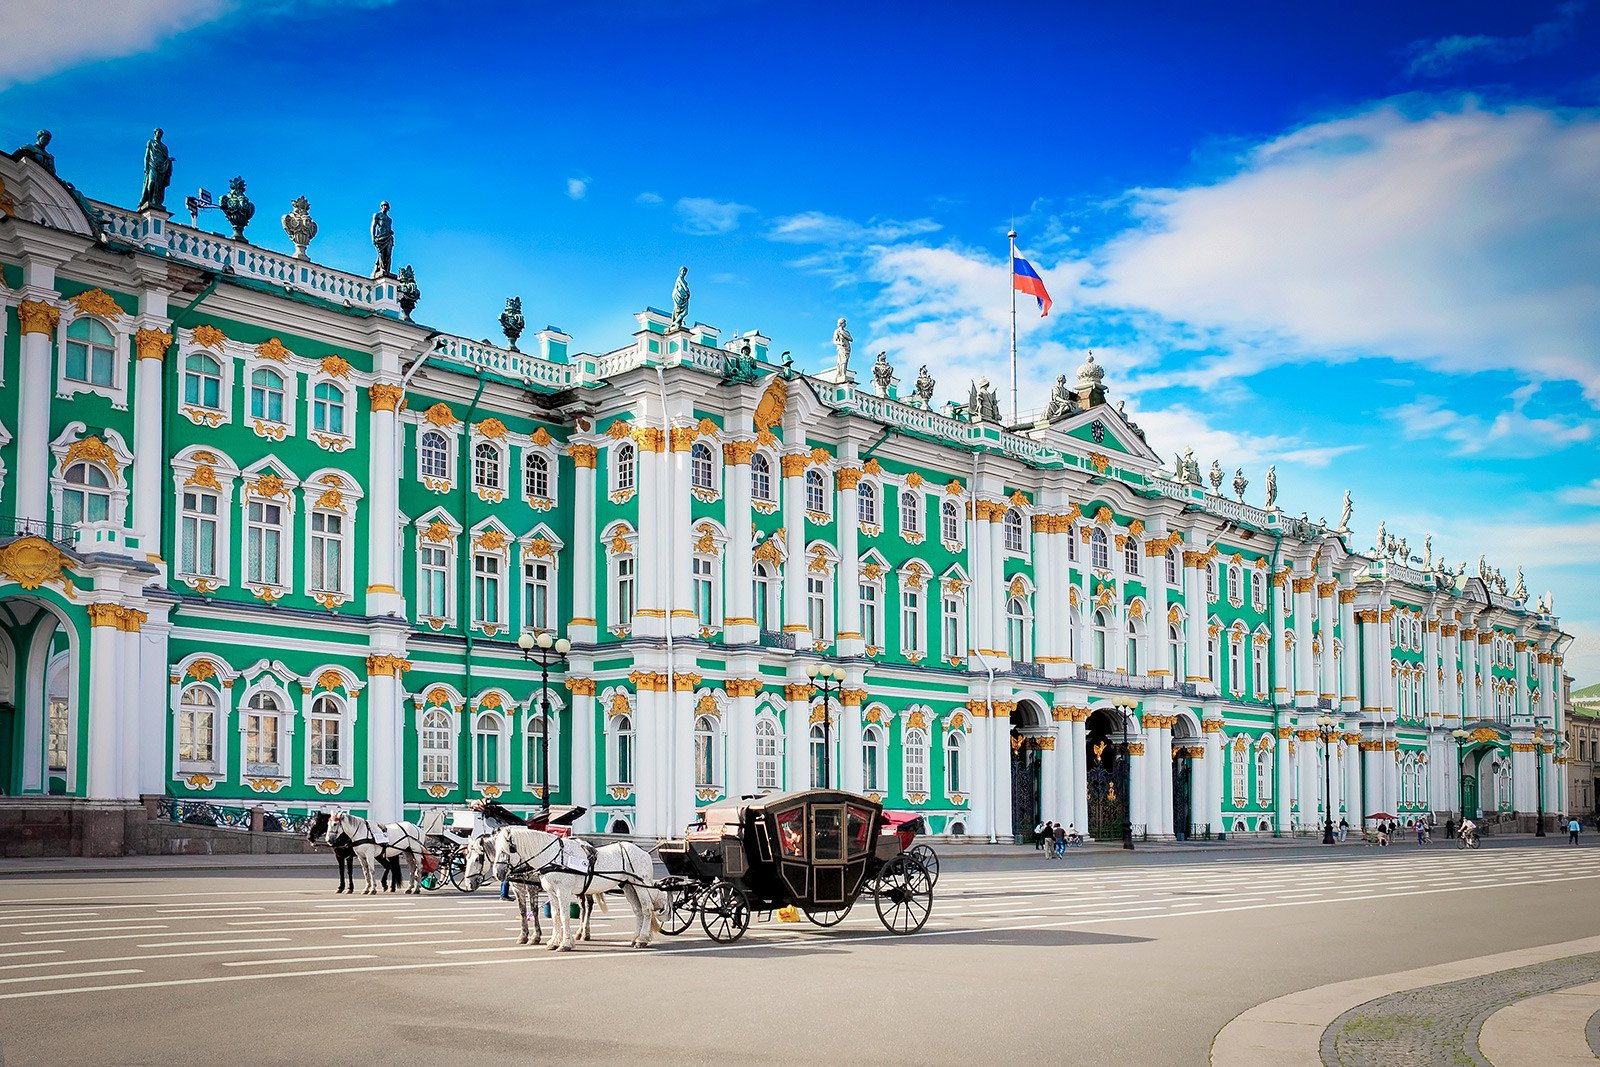

In ten cases, a question about photography was asked in different ways.

In [ ]:
from pathlib import Path
import google.generativeai as genai

genai.configure(api_key="")

# Set up the model
generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

# Validate that an image is present
if not (img := Path("")).exists():
  raise FileNotFoundError(f"Could not find image: {img}")

image_parts = [
  {
    "mime_type": "image/jpeg",
    "data": Path("image0.jpeg").read_bytes()
  },
]

prompt_parts = [
  "What's in the picture?\n",
  image_parts[0],
]

response = model.generate_content(prompt_parts)
print(response.text)

##Test №1

**Common Input**

№1

Input: What is in the picture? 
Output:The picture shows the Winter Palace in Saint Petersburg, Russia. It was the official residence of the Russian tsars from 1732 to 1917. The palace is now a museum.

№2

Input: Describe the picture.
Output:  The picture shows the Hermitage Museum in Saint Petersburg, Russia. The museum is one of the largest and oldest in the world, and it houses a vast collection of art and artifacts from around the globe. The museum is located in the Winter Palace, which was once the home of the Russian royal family. The palace is a magnificent example of Baroque architecture, and it is one of the most popular tourist destinations in Saint Petersburg.

№3

Input: Describe this building.
Output: The building is the Winter Palace in Saint Petersburg, Russia. It was the official residence of the Russian tsars from 1732 to 1917. The palace is located on the Palace Embankment of the Neva River. The Winter Palace is one of the largest and most opulent palaces in the world. It has over 1,500 rooms, 1,786 doors, and 1,945 windows. The palace is decorated with over 30 tons of gold. The Winter Palace is a UNESCO World Heritage Site.

№4

Input: Describe everything in rhis picture.
Output: The picture shows a view of the Winter Palace in St. Petersburg, Russia. The palace is a large, green and white building with many windows and columns. There is a large open space in front of the palace with a road running through it. There are trees and people on either side of the road. The sky is blue and there are some clouds in the sky. There is a Russian flag flying on top of the palace.

№5

Input: What can you say about this?
Output: The image shows the Winter Palace in Saint Petersburg, Russia. It was the official residence of the Russian tsars from 1732 to 1917. The palace is now a museum.

**Special Input**

№1

Input: Tell us the history of the Hermitage Museum.
Output: The Hermitage Museum is one of the largest and oldest museums in the world. It is located in Saint Petersburg, Russia. The museum was founded in 1764 by Catherine the Great and has been open to the public since 1852. The museum's collection includes over three million items, including paintings, sculptures, jewelry, and archaeological artifacts. The Hermitage is housed in a complex of six buildings, including the Winter Palace, which was the official residence of the Russian tsars. The museum is a popular tourist destination and is visited by over four million people each year.

№2

Input: Tell us about the art objects inside the Hermitage.﻿
Output: The Hermitage is home to a vast collection of art objects, including paintings, sculptures, decorative arts, and archaeological artifacts. The collection spans a wide range of cultures and periods, from ancient Egypt to the present day. Some of the most famous works in the collection include Rembrandt's "The Return of the Prodigal Son," Leonardo da Vinci's "Madonna and Child with St. Anne," and Michelangelo's "Pietà."

In addition to its permanent collection, the Hermitage also hosts temporary exhibitions throughout the year. These exhibitions often feature works from other museums around the world, as well as from private collections. The Hermitage is also home to a number of research centers and libraries, which are open to scholars and students.

№3

Input: Tell us about the historical value of the building in this picture.﻿
Output: The building in the picture is the Winter Palace in St. Petersburg, Russia. It was the official residence of the Russian tsars from 1732 to 1917. The palace is a UNESCO World Heritage Site and is one of the most popular tourist destinations in Russia.

The Winter Palace was designed by the Italian architect Bartolomeo Rastrelli and was built between 1732 and 1754. The palace is a magnificent example of Baroque architecture and is one of the largest palaces in the world. It has over 1,500 rooms, 1,786 doors, and 1,945 windows.

The Winter Palace was the scene of many important historical events. In 1825, the Decembrist Revolt took place in the palace square. In 1905, the palace was attacked by workers during the Russian Revolution. In 1917, the palace was stormed by the Bolsheviks and the Russian Provisional Government was overthrown.

The Winter Palace is now a museum and is open to the public. The museum houses a collection of over 3 million artifacts, including paintings, sculptures, furniture, and jewelry. The palace is a popular tourist destination and is visited by millions of people each year.

№4

Input: Where can I find information about ticket prices for this building?
Output: The building in the picture is the Hermitage Museum in Saint Petersburg, Russia. You can find information about ticket prices on the museum's website.

№5

Input: Make a route to this building from Moscow.
Output: The distance from Moscow to St. Petersburg is about 700 kilometers. You can get there by plane, train, or car.

By plane, the flight time is about 1 hour and 30 minutes. There are direct flights from Moscow to St. Petersburg every day. The cost of a one-way ticket starts from 100 euros.

By train, the journey takes about 8 hours. There are several direct trains from Moscow to St. Petersburg every day. The cost of a one-way ticket starts from 50 euros.

By car, the journey takes about 10 hours. The route from Moscow to St. Petersburg is well-maintained and easy to follow. The cost of petrol for the journey is about 50 euros.

Once you arrive in St. Petersburg, you can take a taxi or public transport to the Hermitage Museum. The museum is located in the city center, and it is easy to reach from any part of the city.

The Hermitage Museum is one of the largest and most comprehensive museums in the world. It houses a vast collection of art and artifacts from all over the world. The museum is open every day except Monday, and the entrance fee is 700 rubles.

**Conclusions**

As we can see, the model defines the image without any problems. Simple questions in some cases can give a detailed answer. The context in is optional. However, a detailed question will give a more accurate and detailed answer.

##Test №2

Changing model parameters, searching for optimal solutions.

The following parameters will be changed during operation:

generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

Parameters for Customizing Response Generation:

**Temperature:**

Controls the randomness or creativity of the generated text.
Lower values (0.5-0.7): Produce more conservative, predictable responses, sticking closely to the training data.
Higher values (0.8-1.0): Introduce more diversity and unexpectedness, with potential for greater creativity and novelty, but also a higher risk of generating nonsensical or off-topic text.

**Top-k:**

Limits the number of possible word choices considered at each step of generation.
Higher values (50-100): Allow for a wider range of potential responses, potentially increasing creativity and diversity.
Lower values (10-20): Constrain the model to more focused, on-topic responses, reducing the chance of generating irrelevant or rambling text.

**Top-p:**

Filters word choices based on their cumulative probability, ensuring a certain level of coherence and fluency.
Higher values (0.9-1.0): Prioritize more common and predictable word sequences, promoting fluent and grammatically correct text.
Lower values (0.7-0.8): Allow for more unusual word combinations, potentially leading to more creative and surprising phrasing.


The tests will use the same picture of the Hermitage and the following question will be asked: What's in the picture?

№1

Parametres: generation_config = {
  "temperature": 0.1,
  "top_p": 0.2,
  "top_k": 8,
  "max_output_tokens": 4096,
}

Output: This is the State Hermitage Museum in Saint Petersburg, Russia.

№2

Parametres: generation_config = {
  "temperature": 1,
  "top_p": 1,
  "top_k": 100,
  "max_output_tokens": 4096,
}

Output: This is the State Hermitage Museum in Saint Petersburg, Russia.

№3

Parametres:
generation_config = {
  "temperature": 0.3,
  "top_p": 0.3,
  "top_k": 30,
  "max_output_tokens": 4096,
}

Output: The Hermitage Museum in Saint Petersburg, Russia.

№4

Parametres:generation_config = {
  "temperature": 0.8,
  "top_p": 0.65,
  "top_k": 70,
  "max_output_tokens": 4096,
}

Output: The picture shows the Winter Palace in St. Petersburg, Russia. It was the official residence of the Russian tsars from 1732 to 1917.

№5

Parametres:
generation_config = {
  "temperature": 0.8,
  "top_p": 0.9,
  "top_k": 75,
  "max_output_tokens": 4096,
}

Output: The picture shows the Winter Palace in St. Petersburg, Russia. It was the official residence of the Russian tsars from 1732 to 1917. The palace is now a museum.

##Conclusions

Best Combination for Gemini Pro Vision:

Optimal settings depend on specific use cases and desired outcomes.

General recommendations for Gemini Pro Vision:

Temperature: 0.7-0.9

Top-k: 50-100

Top-p: 0.8-0.9

Additional Considerations:

Experimentation is crucial. Try different combinations to see what works best for your particular needs.
Evaluate generated text carefully. Assess its quality, relevance, coherence, and creativity.
Align parameters with your goals. Consider whether you prioritize safe, predictable responses or more creative, risky ones.